In [1]:
from my_utils import *
from test_raw_data import *
from test_processed_data import *

In [2]:
path = 'C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive/*.csv'
input_files = glob.glob(path)

---

# **Initial Exploration**

In [3]:
df = file_load(input_files)[0]
df0 = file_load(input_files)[0]
df.head()

C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1
C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
required_cols = ['Unnamed: 0','fare_amount', 'pickup_datetime', 'passenger_count']
df_frac = 0.01
trim_raw_data(df, required_cols, df_frac)


,Unnamed: 0,fare_amount,pickup_datetime,passenger_count
195767,35469521,13.0,2012-09-11 13:52:06 UTC,1
160940,40340071,4.1,2012-04-09 09:21:00 UTC,1
72236,4328133,16.5,2009-03-09 10:39:54 UTC,1
131736,20889527,7.0,2014-11-29 05:19:00 UTC,1
7408,18944910,20.0,2013-09-11 15:34:00 UTC,1
...,...,...,...,...
18610,18615158,9.5,2013-10-14 08:26:28 UTC,1
132331,55210236,6.0,2013-07-05 03:47:00 UTC,3
127739,8568211,15.5,2014-04-23 02:17:15 UTC,1
115457,8292885,6.5,2013-05-09 08:11:45 UTC,3


In [20]:
def data_dict_raw_pipeline(df, expected_dtypes):
    dd = create_data_dictionary(df)
    df_dd = dd.make_my_data_dictionary(df)
    df_dd = df_dd.transpose()
    # df_dd = dd.define_data_meaning(df_dd)
    df_dd['Expected_Type'] = expected_dtypes
    df_dd_save = df_dd.to_csv('Data_dict_raw.csv')
    data_dict = pd.read_csv('Data_dict_raw.csv')
    return data_dict

def data_dict_processed_pipeline(df, expected_processed_dtypes):
    dd = create_data_dictionary(df)
    df_dd = dd.make_my_data_dictionary(df)
    df_dd = df_dd.transpose()
    # df_dd = dd.define_data_meaning(df_dd)
    df_dd['Expected_Type'] = expected_processed_dtypes
    df_dd_save = df_dd.to_csv('Data_dict_processed.csv')
    data_dict = pd.read_csv('Data_dict_processed.csv')
    return data_dict

# expected_processed_dtypes = ['int64','float64','datetime64[ns]','int64','int64','object','object','int64']
# data_dict_pro = data_dict_processed_pipeline(data_output, expected_processed_dtypes)

# expected_dtypes = ['int64','float64','datetime64[ns]','int64']
# data_dict_raw = data_dict_raw_pipeline(df, expected_dtypes)

---

In [46]:
expected_raw_dtypes = ['int64','float64','datetime64[ns]','int64']
expected_processed_dtypes = ['datetime64[ns]','float64','float64','float64','float64','float64','float64','float64','float64','float64','float64',]


In [54]:
data = file_load(input_files,path)[0]
required_cols = ['Unnamed: 0','fare_amount', 'pickup_datetime', 'passenger_count']
df = df[required_cols]
df = df.sample(frac=0.01)

C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [27]:
def load_data(path, required_cols, 
              df_frac, file_n,
              expected_raw_dtypes):

    input_files = glob.glob(path)
    df = file_load(input_files)[file_n]
    df0 = file_load(input_files)[file_n]
    
    df = trim_raw_data(df, required_cols, df_frac)
    
    data_dict_raw = data_dict_raw_pipeline(df, expected_raw_dtypes)
    return df, df0, data_dict_raw

required_cols = ['Unnamed: 0','fare_amount', 'pickup_datetime', 'passenger_count']
df_frac = 0.01
file_n = 0
expected_raw_dtypes = ['int64','float64','datetime64[ns]','int64']

res = load_data(path, required_cols, 
              df_frac, file_n,
              expected_raw_dtypes)

C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1
C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1


,Unnamed: 0,Dtype,Expected_Type,Length,Null_Count,Size(Memory),Definition,Range
0,Unnamed: 0,int64,int64,2000,0,16000,NaN,"(34440, 55339074)"
1,fare_amount,float64,float64,2000,0,16000,NaN,"(2.5, 180.0)"
2,pickup_datetime,object,datetime64[ns],2000,0,16000,NaN,"('2009-01-02 02:16:47 UTC', '2015-06-29 18:46:..."
3,passenger_count,int64,int64,2000,0,16000,NaN,"(0, 6)"


In [17]:
def process_raw_data(data, threshold):   
    dataset = Dataset(data, threshold)
    data = dataset.data_transform()
    data = dataset.data_remove_outliers() 

process_raw_data(x[0], 0.05)

In [47]:

def pipeline(data, original_data, threshold, test_features, input_columns, target_column, col_group, col_feature, n_window, cv_splits, test_split, group_by):
    print('Beginning Pipeline...')
    print('Initialising Tests...')
    
    data = file_load(input_files,path)[0]
    data_dict_raw = data_dict_raw_pipeline(data, expected_raw_dtypes)

    print('Processing data...')
    dataset = Dataset(data, threshold)
    data = dataset.data_transform()
    data = dataset.data_remove_outliers() 
    
    print('Grouping data...')
    group_class = GroupClass(data, col_group)
    if group_by == 'hour':
        data = group_class.group_by_hour(col_group)
    elif group_by == 'day':
        data = group_class.group_by_day(col_group)

    print('Performing Feature Extraction...')
    feature_extraction = FeatureExtraction(data, col_feature, n_window)
    data = feature_extraction.calc_pct_change(col_feature)
    data = feature_extraction.calc_sma('passenger_count_pct_change', n_window)
    data = feature_extraction.calc_sma('fare_amount_pct_change', n_window)
    data = feature_extraction.calc_ema('passenger_count_pct_change', n_window)
    data = feature_extraction.calc_ema('fare_amount_pct_change', n_window)
    data = feature_extraction.calc_sma_PED()
    data = feature_extraction.calc_ema_PED()
    
    data_dict_pro = data_dict_processed_pipeline(data, expected_processed_dtypes)

    
    print('Cleaning data...')
    dataset = Dataset(data, threshold)
    data = dataset.data_clean()
    data = dataset.index_set()
    data = dataset.winsorization()
    
    print('Initializing Model Selection Process...')
    model_select = ModelSelection(data, input_columns, target_column, cv_splits, test_split)
    X_train, X_test, y_train, y_test = model_select.split_dataset()
    compare_models = model_select.run_model_evaluation()
    selected_model = model_select.select_initial_model()
   
    print('Initializing Model...')
    model = Model(data, X_train, y_train, selected_model, cv_splits)
    train = model.train_model()
    cv_train = model.cv_predict()
    cv_train_2 = model.cv_score()

    validation = model.validate_model(X_test, y_test)
    y_pred = model.test_model(X_test, y_test)
    visualise = model.visualize_results(X_test, y_test, y_pred)
    metrics = model.initial_model_metrics(X_test, y_test, y_pred)

    return metrics

In [48]:
raw_data = df0
data = df

expected_dtypes = {
    'key': object,
    'fare_amount': float,
    'pickup_datetime': object,
    'passenger_count': np.int64
    }

processed_dtypes = {
    'key': object,
    'fare_amount': float,
    'pickup_datetime': 'datetime64[ns]',
    'passenger_count': np.int64,
    'Label_Hour': np.int64,
    'Label_Date': object,
    'day_name': object,
    'day_of_the_week': np.int64
    }

inspect_cols = [
    'passenger_count', 
    'fare_amount'
    ]

col_group = ['pickup_datetime', 'fare_amount', 'passenger_count','Label_Date']   # Group by columns
col_feature = ['fare_amount', 'passenger_count']   # Feature extraction columns
input_columns = ['sPED']
target_col = 'sPED'

eng_feature_cols = ['fare_amount_pct_change', 'passenger_count_pct_change', 
                    'passenger_count_pct_change_sma', 'fare_amount_pct_change_sma'
                    ]

n_window = 3
threshold = 0.05

Beginning Pipeline...
Initialising Tests...
Processing data...
Grouping data...
Performing Feature Extraction...
Cleaning data...
Initializing Model Selection Process...


Selected model: XGBRegressor
Hyperparameters: {'max_depth': 7, 'n_estimators': 150}
Model score: 0.8443038025332944


Initializing Model...


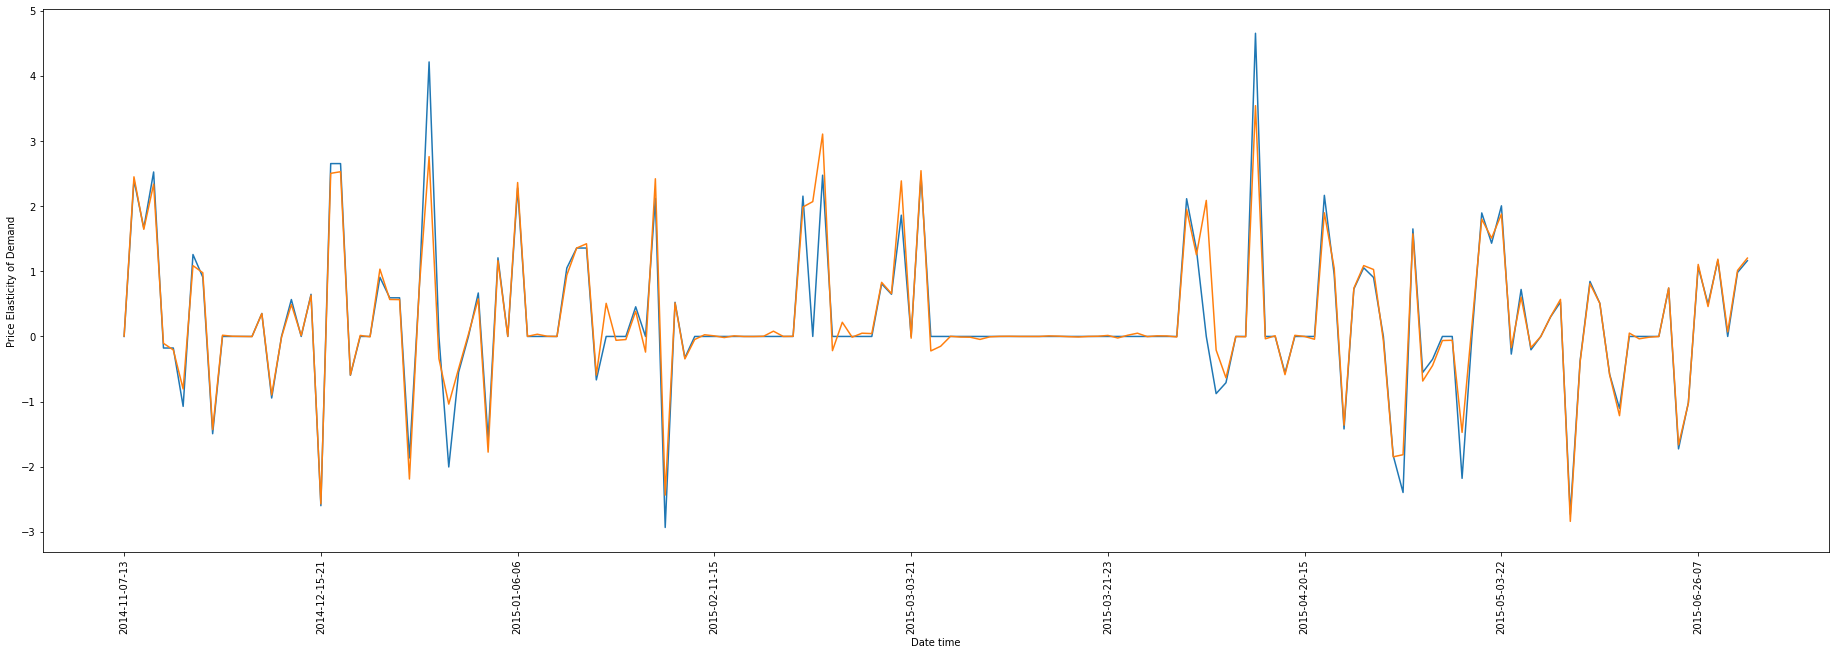

{'Initial_Model': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 'Mean R^2': 0.9168123121955652,
 'Mean MAE': 0.12238720854921839,
 'Mean RMSE': 0.31627228004428204}

In [49]:
data = df
original_data = df0

test_features = ['fare_amount', 'passenger_count']   # Feature extraction columns

col_group = ['pickup_datetime', 'fare_amount', 'passenger_count','Label_Date']   # Group by columns
col_feature = ['fare_amount', 'passenger_count']   # Feature extraction columns
input_columns = ['sPED']
target_column = ['sPED']
n_window = 3
threshold = 0.05

cv_splits = 10
test_split = 0.1


data_output = pipeline(data,
                       original_data,
                       threshold, 
                       test_features,
                       input_columns, 
                       target_column, 
                       col_group, 
                       col_feature, 
                       n_window, 
                       cv_splits, 
                       test_split,
                       group_by='hour')
data_output

In [50]:
data_output

{'Initial_Model': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 'Mean R^2': 0.9168123121955652,
 'Mean MAE': 0.12238720854921839,
 'Mean RMSE': 0.31627228004428204}

In [51]:
# pytest.main(['-q', '-p', 'no:warnings', '--tb=no', 'test_raw_data.py'])

In [52]:
#pytest.main(['-q', '-p', 'no:warnings', '--tb=no', 'test_processed_data.py'])

In [53]:
data_dict_raw

NameError: name 'data_dict_raw' is not defined